Imports for all exercises

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
%matplotlib inline

# A. Importing, cleaning and numerical summaries

A2. Import data:

In [2]:
df = pd.read_csv('data.csv')

A3. Check number of observations:

In [3]:
obs, columns = df.shape
obs

153

A4. Obtain column headings

In [4]:
col_names = df.columns
col_names

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia',
       'Job Satisfaction', 'Region'],
      dtype='object')

A5. Check data type of each column

In [5]:
df.dtypes

Country              object
Happiness Rank        int64
Happiness Score     float64
Economy             float64
Family              float64
Health              float64
Freedom             float64
Generosity          float64
Corruption          float64
Dystopia            float64
Job Satisfaction    float64
Region               object
dtype: object

A6. Check if there are missing values

In [6]:
# Consider 0. as NaN
df_aux = df.replace(to_replace=0., value=np.nan, inplace=False)
obs_valid, columns_valid = df_aux.dropna().shape
obs_missing = obs - obs_valid
obs_missing

7

A7. Remove missing values

In [7]:
# Get new dataset with 0. as NaN
df_clean = df.replace(to_replace=0., value=np.nan, inplace=False)
df_clean = df_clean.dropna().copy()
df_clean.shape

(146, 12)

A8. Get mean, min and max of each numerical column

In [8]:
scores = df_clean.drop(columns='Happiness Rank').describe().loc[['mean', 'min', 'max']]
scores

,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
mean,5.399548,0.992581,1.199751,0.558807,0.417253,0.247376,0.125244,1.858491,75.465068
min,2.905000,0.022643,0.396103,0.005565,0.014996,0.010165,0.004388,0.377914,44.800000
max,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


A9. List 10 happiest countries

In [9]:
df_most_happy =df_clean.sort_values(by='Happiness Score', ascending=False).head(10)
df_most_happy

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
109,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
97,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
47,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
78,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
101,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
105,Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
81,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
5,New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
148,Australia,10,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,89.2,Asia-Pacific
21,Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,92.7,Western Europe


A10. List 10 least happy countries

In [10]:
df_least_happy =df_clean.sort_values(by='Happiness Score', ascending=True).head(10)
df_least_happy

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
40,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,54.3,Africa
45,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,57.8,Africa
39,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,62.7,Asia-Pacific
133,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,51.7,Africa
53,Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,44.8,Africa
107,Guinea,149,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,55.1,Africa
139,Liberia,148,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,56.6,Africa
138,Yemen,146,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,58.9,Asia-Pacific
124,Haiti,145,3.603,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168,48.5,Latin America
99,Madagascar,144,3.644,0.305809,0.913020,0.375223,0.189197,0.208733,0.067232,1.584613,45.3,Africa


# B. Indexing and grouping

B.1 Groupd data by Region and save it in a csv file

In [11]:
regions = ['Western Europe', 'Africa', 'Eastern Europe', 'Asia-Pacific', 'Latin America', 'North America']
for region in regions:
    df_region = df_clean[df_clean['Region'] == region]
    df_region.to_csv(region+'.csv')

B.2 Compute mean happiness score per region and rank the regions from most happy to less happy

In [12]:
# I use the data already classified in exercise B.1
regions = np.array(['Western Europe', 'Africa', 'Eastern Europe', 'Asia-Pacific', 'Latin America', 'North America'])
reg_happiness_score = np.empty(6)
for i, region in enumerate(regions):
    df_region = pd.read_csv(region+'.csv')
    reg_happiness_score[i] = df_region['Happiness Score'].mean()
ind_happiness = np.flip(reg_happiness_score.argsort())
reg_happiness = regions[ind_happiness]
reg_happiness_score = reg_happiness_score[ind_happiness]
print(reg_happiness)
print(reg_happiness_score)

['North America' 'Western Europe' 'Latin America' 'Eastern Europe'
 'Asia-Pacific' 'Africa']
[7.15450001 6.88047371 5.95781819 5.52994733 5.35832555 4.31627501]


B.3 Number of countries in each region with happiness score above 6

In [13]:
# I use the data already classified in exercise B.1
regions = np.array(['Western Europe', 'Africa', 'Eastern Europe', 'Asia-Pacific', 'Latin America', 'North America'])
n_countries_above_6 = np.empty(6)
for i, region in enumerate(regions):
    df_region = pd.read_csv(region+'.csv')
    n_countries_above_6[i] = df_region['Happiness Score'][df_region['Happiness Score'] > 6].count()
n_countries_above_6

array([17.,  0.,  1., 11., 13.,  2.])

B.4 Compute the differences between minimum and maximum happiness score for each region.

In [14]:
regions = np.array(['Western Europe', 'Africa', 'Eastern Europe', 'Asia-Pacific', 'Latin America', 'North America'])
happiness_range = np.empty(6)
for i, region in enumerate(regions):
    df_region = pd.read_csv(region+'.csv')
    happiness_range[i] = df_region['Happiness Score'].max()-df_region['Happiness Score'].min()
print(happiness_range)
regions[np.argmax(happiness_range)]

[2.34200001 2.96700025 1.454      3.85200024 3.47600007 0.32299995]


'Asia-Pacific'

# C. Bar plot of the Happiness Score

C.1 Horizontal bar plot of the Happiness score of the top 10 happiest countries. Names of the countries listed vertically along the y-axis and the x-axis should have labels for each number from 0 to 8. Ensure that the chart has an appropriate title and labels.

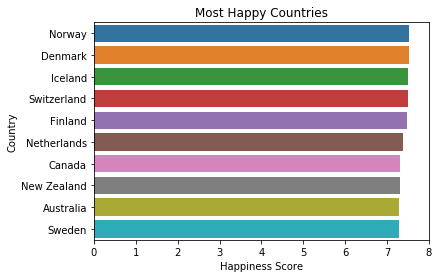

In [15]:
sns.barplot(x=df_most_happy['Happiness Score'], y=df_most_happy['Country'])
plt.title('Most Happy Countries')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.show()

C.2 Modify the horizontal bar chart to turn it into a stacked bar chart where the overall happiness score is divided into the seven parts corresponding to the columns Economy, Family, Health, Freedom, Generosity, Corruption, Dystopia. Choose a distinct color for each category and include an appropriate legend with your chart.

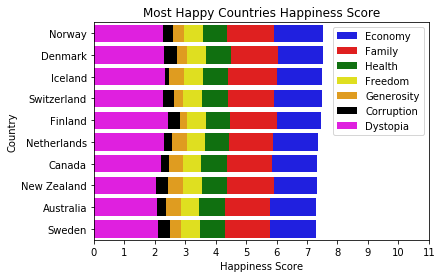

In [16]:
labels = ['Economy', 'Family', 'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia']
colors = ['Blue', 'Red', 'Green', 'Yellow', 'Orange', 'Black', 'Magenta']
values = df_most_happy['Happiness Score'].copy()
for i, (color, label) in enumerate(zip(colors, labels)):    
    if i > 0:
        values -= df_most_happy[labels[i-1]]
    sns.barplot(values, df_most_happy['Country'], label=label, color=color)
plt.title('Most Happy Countries Happiness Score')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
plt.legend()
plt.show()

C.3 Same as C.2 but for all countries from region Africa

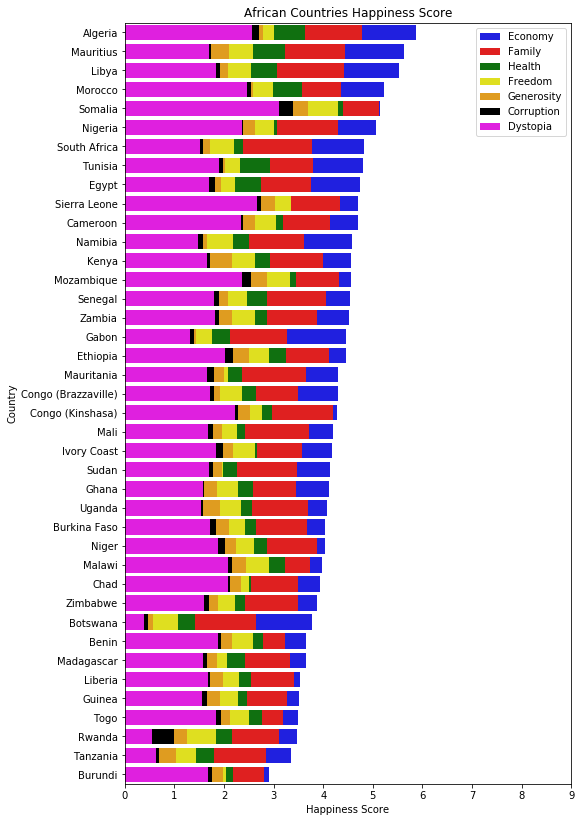

In [17]:
# load Africa data
df_Africa = pd.read_csv('Africa.csv')
# Sort by Happiness score
df_Africa = df_Africa.sort_values('Happiness Score', ascending=False)

# Create plot
labels = ['Economy', 'Family', 'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia']
colors = ['Blue', 'Red', 'Green', 'Yellow', 'Orange', 'Black', 'Magenta']
values = df_Africa['Happiness Score'].copy()

plt.figure(figsize=[8, 14])
for i, (color, label) in enumerate(zip(colors, labels)):    
    if i > 0:
        values -= df_Africa[labels[i-1]]
    sns.barplot(values, df_Africa['Country'], label=label, color=color)
plt.title('African Countries Happiness Score')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.legend()
plt.show()

# D. Histogram of Job Satisfaction

D.1 Obtain a histogram of the Job Satisfaction using the following categories: 40%-50%, 50%-60%, 60%-70%, 70%-80%, 80%-90%, 90%-100%

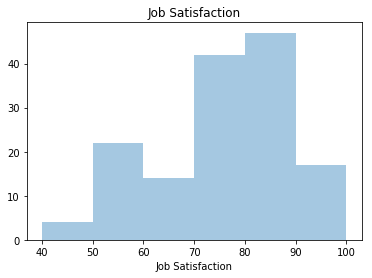

In [18]:
sns.distplot(df_clean['Job Satisfaction'], bins=[40., 50., 60., 70., 80., 90., 100.], kde=False)
plt.title('Job Satisfaction')
plt.show()

# E. Pairwise Scatter plots

E.1 Scatter plots of Happiness score vs each other variable

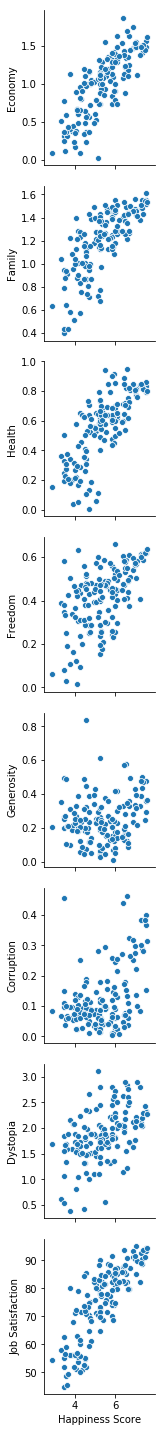

In [19]:
sns.pairplot(df_clean, x_vars='Happiness Score', y_vars=['Economy', 'Family', 'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia', 'Job Satisfaction'])
plt.show()

# F. Correlation

F.1. Correlation between Hapiness Score and each other variable

In [20]:
df_clean.corr()['Happiness Score'].sort_values()

Happiness Rank     -0.993777
Generosity          0.158920
Corruption          0.438540
Dystopia            0.493069
Freedom             0.568870
Family              0.748542
Health              0.769818
Economy             0.804390
Job Satisfaction    0.824810
Happiness Score     1.000000
Name: Happiness Score, dtype: float64

# G. Probabilities

G.1 Probability that a randomly selected country with Happiness score over 6.0 is from Western Europe

In [21]:
regions = df_clean[df_clean['Happiness Score'] > 6]['Region'].to_numpy()

experiments = 10000
counter = 0
tested_region = 'Western Europe'
for i in range(experiments):
    region = regions[random.randrange(regions.size)]
    if region == tested_region:
        counter += 1
        
counter / experiments

0.3967

# H. Matrices

H.1 Define a matrix whose rows correspond to countries and the columns to the regions. Fill in the matrix with 0/1 values where entry (i,j) is a 1 if the country in row i is in the region in column j and a 0 otherwise.

In [22]:
regions = np.array(['Western Europe', 'Africa', 'Eastern Europe', 'Asia-Pacific', 'Latin America', 'North America'])
reg_country = np.empty((df_clean.shape[0], 6), dtype=np.int)
for i, region in enumerate(regions):
    reg_country[:, i] = df_clean['Region'] == region
reg_country

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
 